# From whole video to multiple pictures all from positive classes.

In [4]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
YOLOV7_FOLDER = '/content/drive/My Drive/Bundesliga/YOLO7'
VIDEOS_FOLDER = '/yolov7/runs/detect'
CLIPS_FOLDER = YOLOV7_FOLDER + VIDEOS_FOLDER
os.chdir(CLIPS_FOLDER)
! pwd

/content/drive/My Drive/Bundesliga/YOLO7/yolov7/runs/detect


### Working with only the first video for the moment

In [33]:
os.chdir(CLIPS_FOLDER + '/clips')
! pwd

/content/drive/My Drive/Bundesliga/YOLO7/yolov7/runs/detect/clips


In [29]:
vidcap = cv2.VideoCapture('08fd33_0.mp4')
success, image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image) # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success) # failed only on the last frame (750), but it's not important
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [31]:
from google.colab.patches import cv2_imshow

In [34]:
! pwd

/content/drive/My Drive/Bundesliga/YOLO7/yolov7/runs/detect/clips


(1080, 1920, 3)


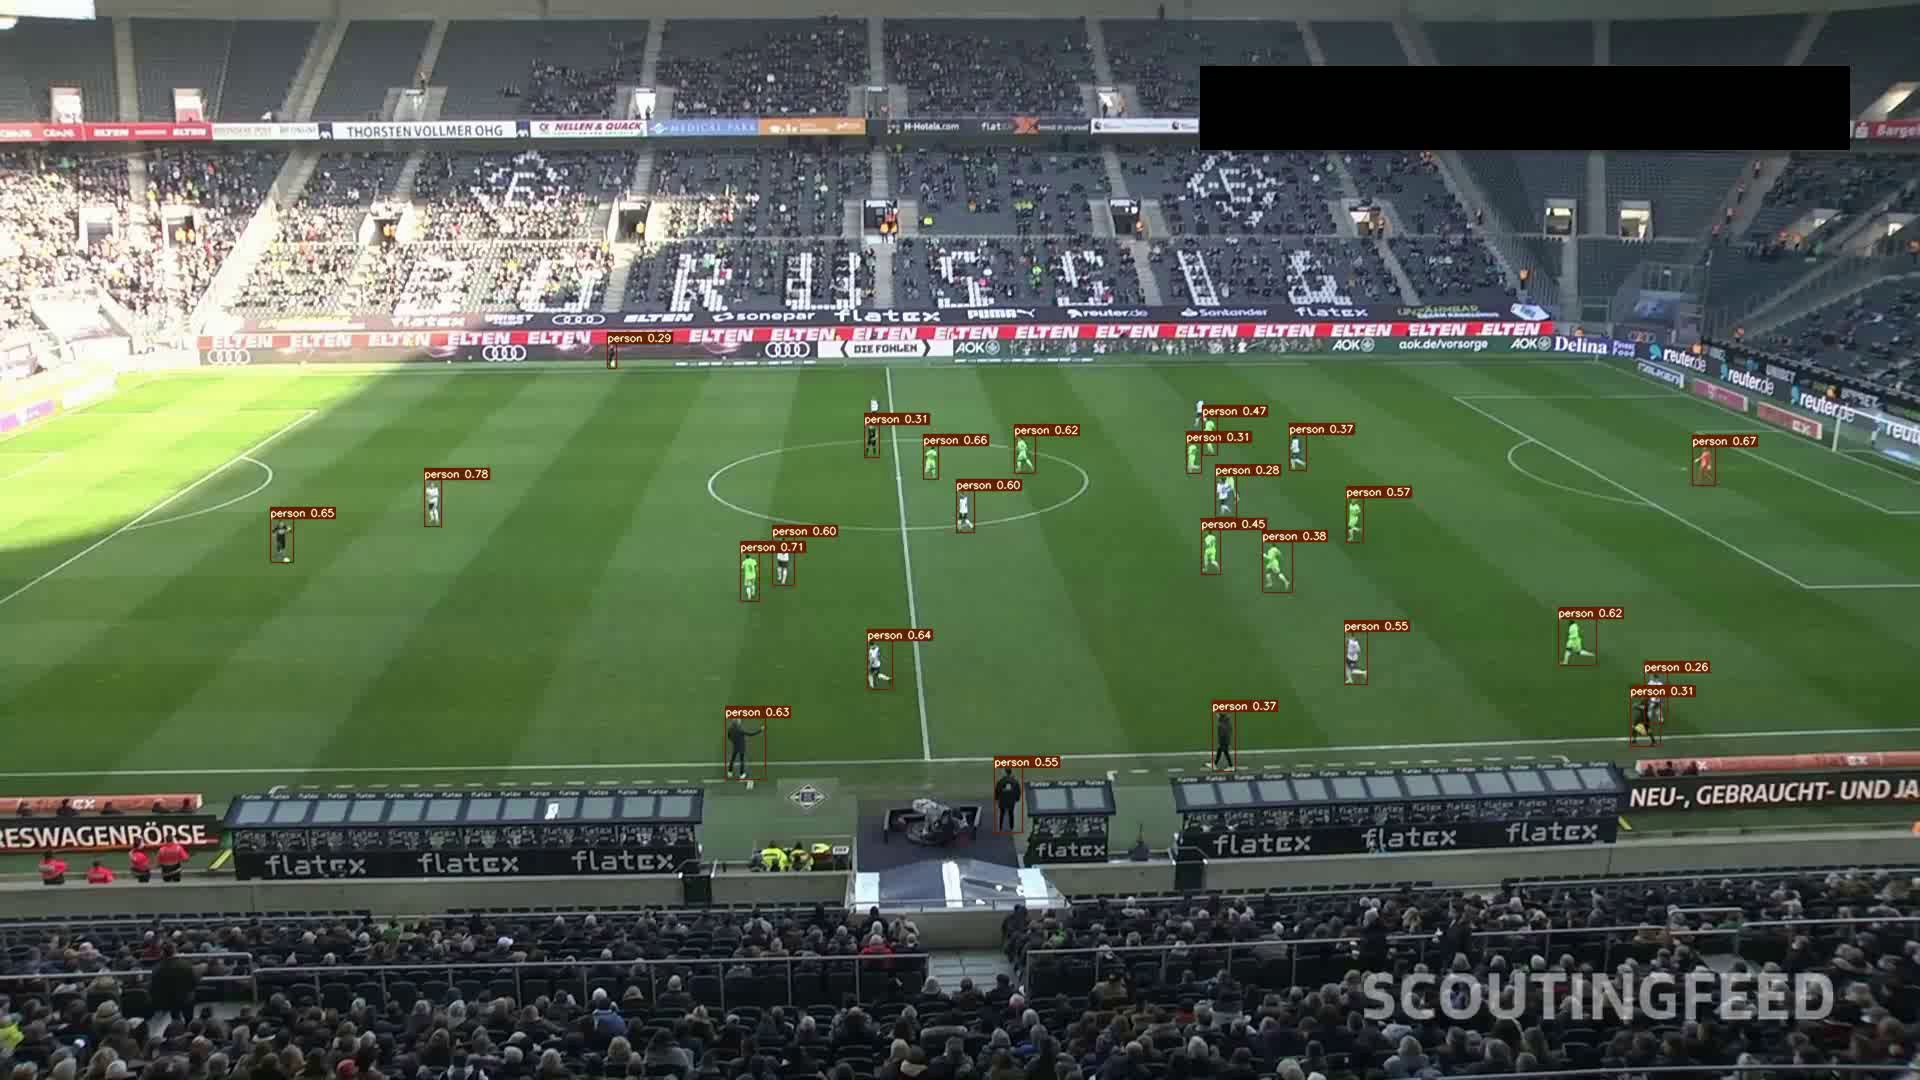

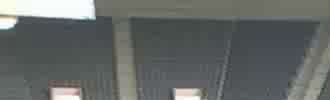

In [40]:
img = cv2.imread('frame0.jpg')
print(img.shape) # Print image shape
cv2_imshow(img) # cv2_imshow("original", img)
 
# Cropping an image
cropped_image = img[0:100, 0:330] # Random input, must be replaced with values from labels folder (where the ball is)
 
# Display cropped image
cv2_imshow(cropped_image) # cv2_imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

### Working with highest resolution YOLO, ball is identified better

In [61]:
os.chdir(CLIPS_FOLDER + '/exp9')
! pwd

/content/drive/My Drive/Bundesliga/YOLO7/yolov7/runs/detect/exp9


In [42]:
video = '08fd33_0'
vidcap = cv2.VideoCapture(f'{video}.mp4')
success, image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image) # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1

In [90]:
CLASS_INDEX = 0
XMIN_INDEX = 1
YMIN_INDEX = 2
BALL_CLASS = '32'
X_SIZE = 1928
Y_SIZE = 1024
CROP_SIZE = 200 # pixels, size of crop = (CROP_SIZExCROP_SIZE)

In [93]:
label_txt = video + '_1.txt'
with open('labels/' + label_txt) as f:
  reader = f.read()
identified_objects = [i.split(' ') for i in reader.split('\n')]

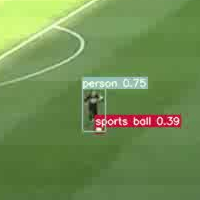

In [94]:
for object_ in identified_objects:
  if object_[CLASS_INDEX] == BALL_CLASS:
    x = int(float(object_[XMIN_INDEX]) * X_SIZE)
    y = int(float(object_[YMIN_INDEX]) * Y_SIZE)
    radius = CROP_SIZE // 2
    ymin = max(y - radius, 0)
    ymax = min(y + radius, Y_SIZE)
    xmin = max(x - radius, 0)
    xmax = min(x + radius, X_SIZE)

    img = cv2.imread('frame0.jpg')
    cropped_image = img[ymin:ymax, xmin:xmax] # Ww change from (x, y) to (y, x) to work with cv2_imshow
    cv2_imshow(cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
FRAMES = 750
for frame in range(FRAMES):


(1080, 1920, 3)


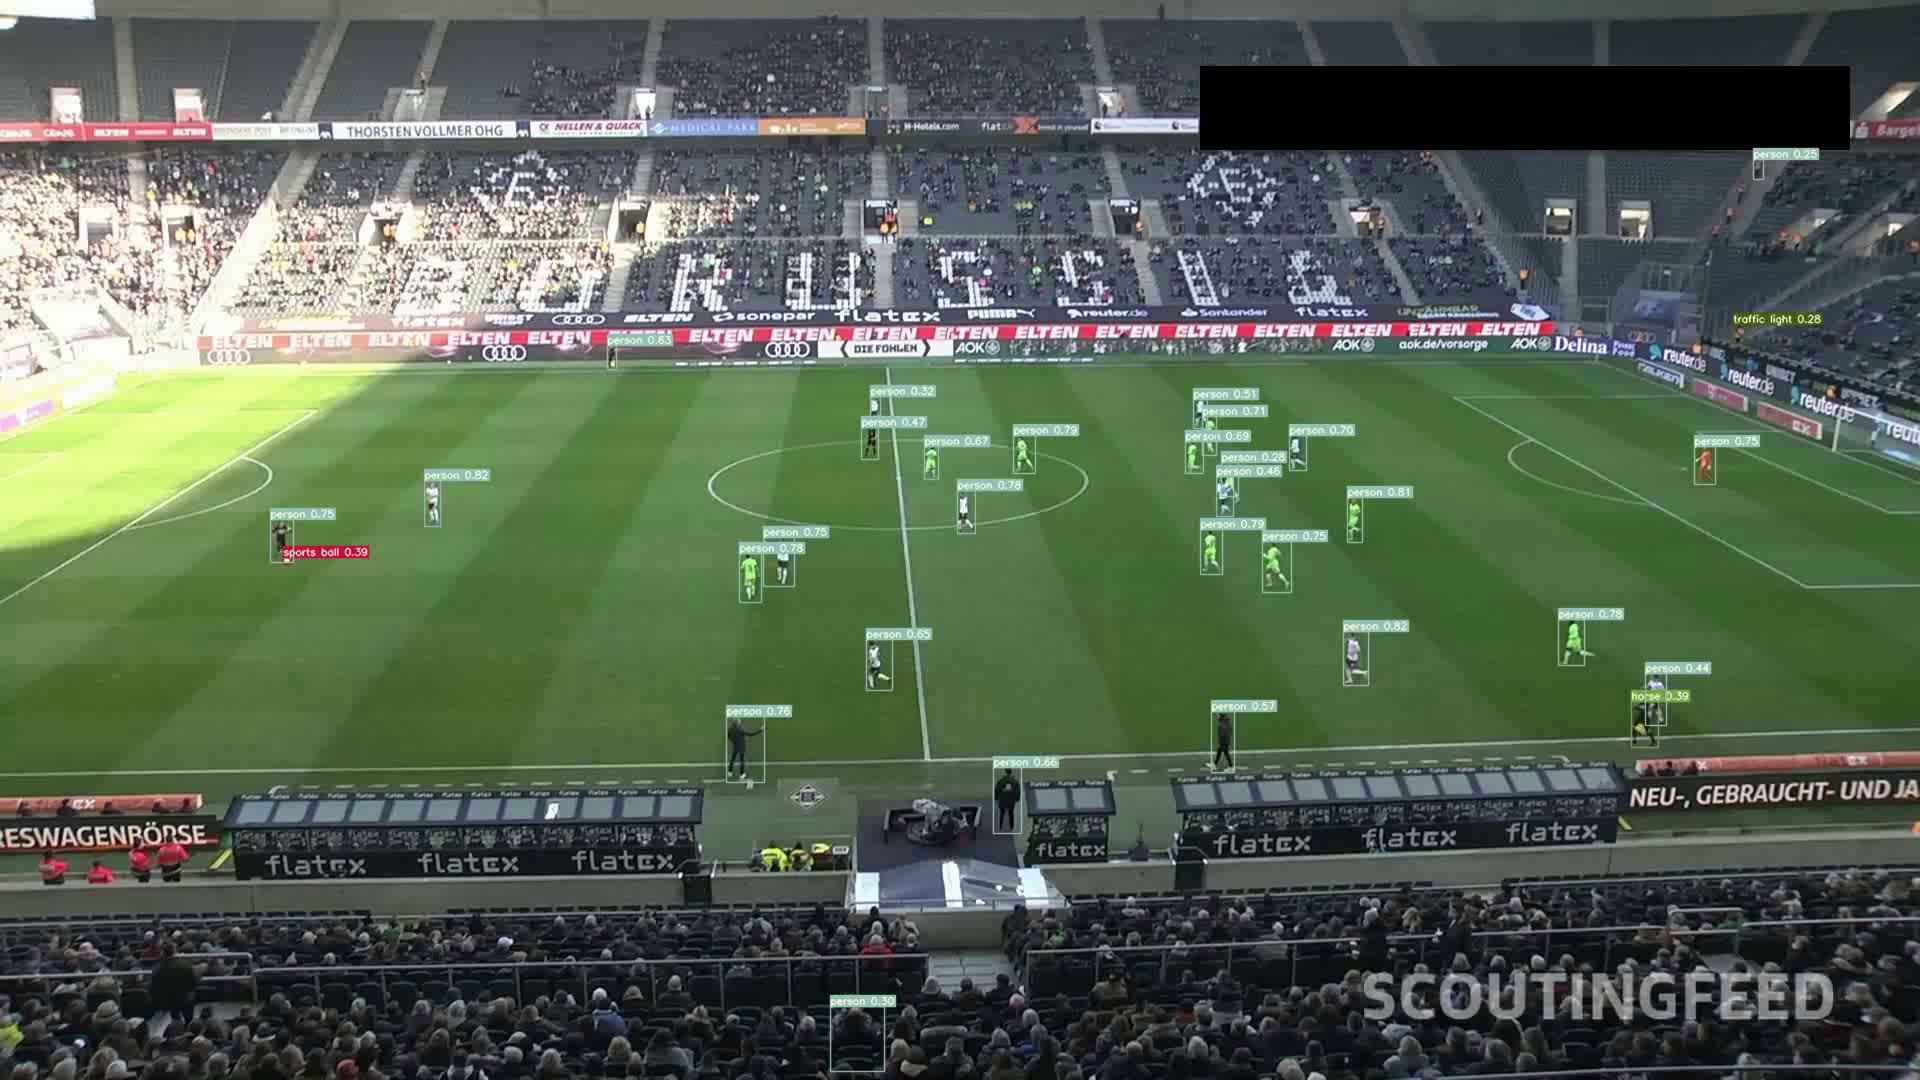

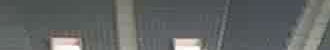

In [66]:
img = cv2.imread('frame0.jpg')
print(img.shape) # Print image shape
cv2_imshow(img) # cv2_imshow("original", img)
 
# Cropping an image
cropped_image = img[50:100, 0:330] # Random input, must be replaced with values from labels folder (where the ball is)
 
# Display cropped image
cv2_imshow(cropped_image) # cv2_imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()